In [6]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import numpy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Turn in an image (e.g., screenshot) or PDF copy of any code that is part of your answer. Make sure all images and PDF pages are properly rotated. Make sure that all pages are clearly visible. 

Tips: Use the document scanner function on your smart phone to take better page "scans" using your camera. Make sure your screen is not shifted toward warmer colours (some devices filter blue light at night) giving it a dim and orange appearance. 

# Q1
Let $A\in \mathbb{R}^{n\times n}$, and let the full SVD decomposition of $A$ be written as $A = U\Sigma V^T$. Define the $2n\times 2n$ matrix
$$ M = 
\begin{bmatrix}
0 & A^T \\
A & 0
\end{bmatrix}.
$$

## A
Verify that $M$ is symmetric.

## B
One can show that symmetric matrices are diagonalizable and have real eigenvalues. Find an eigenvalue decomposition of the form $M = X\Lambda X^{-1}$, in terms of the SVD.

# Q2
## A
Using the full singular value decomposition, 
$$A =  
\begin{bmatrix}
\hat{U} & U_0
\end{bmatrix}
\begin{bmatrix}
\hat{\Sigma} & \mathbf{0} \\
\mathbf{0} & \mathbf{0}
\end{bmatrix}
\begin{bmatrix}
\hat{V}^T \\ V_0^T
\end{bmatrix},$$
derive a practical algorithm for computing the pseudo inverse of any matrix $A\in \mathbb{R}^{m\times n}$. Do not assume that the matrix is full rank or that $m>n$. Your algorithm should have an additional parameter `tol` $\geq 0$ such that any singular value $\sigma_i <$ `tol` is treated as being exactly zero.

## B
Implement your algorithm in Python and use it to solve the following least squares problem. You may use the built in function `svd` to compute the SVD of $A$. Note that your algorithm should not explicitly calculate the pseudo inverse matrix, rather it should solve a linear system for a given right hand side vector.

## C
Let `y` be an array of $m=23$ points uniformly space on the interval $[-5, 6]$. Let $A$ be the $m\times n$ Vandermonde matrix for an $n-1$ degree polynomial sampled at the $m$ points in `y`. Let $b = \sin(\pi y/5) + y/5$. Using the result of part B, compute the least squares solution for $n=1, 3, 6, 19$ and compare the results in a graph. Do this first for `tol`$=0$. Show what happens when you increase `tol`.



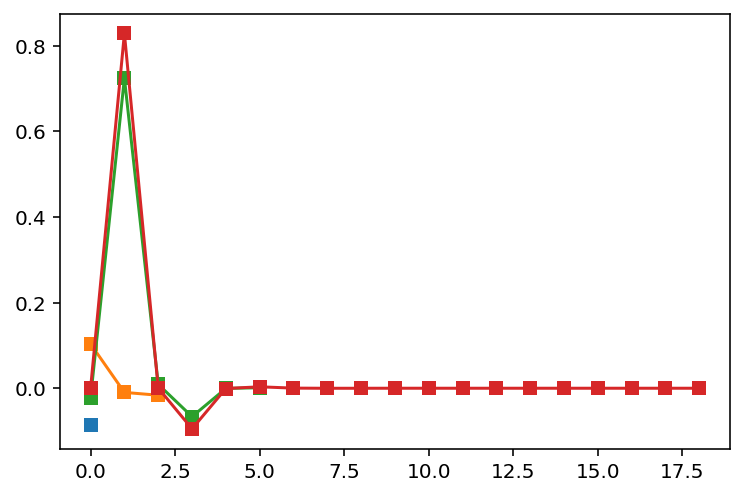

In [45]:
#Q_B
def n_algo(A,m,n,tol):
    U, sigma, VT = svd(A)
    Ak = zeros([m, n])
    for j in arange(n):
        uj = U[:, j]
        vj = VT[j, :]
        if sigma[j] < tol:
            sigma[j]=0
        Ak += sigma[j]*uj[:, None]@vj[:, None].T
    Uhat, sigma, Vhat_T = svd(Ak, full_matrices=False) ## sigma is the vector of diagonal entries, not the matrix
    Vhat = Vhat_T.T
    y = (1/sigma[:, None])*(Uhat.T@b) ## this is equivalent to solving Sigma_hat@y = Uhat.T@b
    x = Vhat@y
    return x
#Q_C
def A(n):
    m=23
    y=linspace(-5,6,m)
    A=np.ones((1,m,n),dtype=np.float64)
    B=A.tolist()
    A=B[0]    
    for i in range(0,m):
        for j in range(0,n):
            A[i][j]=y[i]**j
    A=array(A)
    return A

m=23
y=linspace(-5,6,m)
b=array([sin(pi*y*5**(-1)+y*5**(-1))])
b=b.T

A1=A(1)
A2=A(3)
A3=A(6)
A4=A(19)

plot(n_algo(A1,23,1,0),"-s")
plot(n_algo(A2,23,3,0),"-s")
plot(n_algo(A3,23,6,0),"-s")
plot(n_algo(A4,23,19,0),"-s")


# Q3
In the cells below I provide code to load an image that I took some years ago at a conference in Corsica. It will load image data and convert it into a two dimensional array of 64bit floating point values, normalized so that all values are within the interval $[0, 1]$. Each value of the array encodes a pixel of the image. A value of zeros indicates pure black and a value of one indicates pure white.

Let the resulting image matrix be $A=$ `img_array`. Note that $A\in \mathbb{R}^{m\times n}$ with $m=750$ and $n=1000$.

Let $A = \hat{U}\hat{\Sigma}\hat{V}^T$ be the reduced SVD of the image matrix. Let $u_j$ and $v_j$ be the columns of the matrices $\hat{U}$ and $\hat{V}$, respectively. The reduced SVD representation of the image can be expressed as the *rank revealing decomposition*,
$$A = \sum_{j=1}^r \sigma_j u_j v_j^T,$$
where $r$ is the rank of the matrix. This shows that the matrix $A$ can be represented as a sum of rank one matrices (the outer product $u_j v_j^T$ is a rank one matrix), weighted by the singular values $\sigma_j$.

# A 
What is the maximum value that $r$ can take for the matrix $A$ (stored in `img_array`)?

# B
Compute the reduced SVD of $A$ (stored in `img_array`) and plot the singular values

# C
Suppose that, as in Q2, we set a threshold `tol` $\geq 0$ such that any singular value $\sigma_i <$ `tol` is treated as being exactly zero. This will result in a reduced rank representation of the matrix, with a new rank $\tilde{r} \leq r$. The above formula becomes
$$\tilde{A} = \sum_{j=1}^{\tilde{r}} \sigma_j u_j v_j^T. $$
Using different values of `tol`, compute the low rank approximation of the image matrix $\tilde{A}$ and use `imshow` (see below) with a greyscale colormap to view it. Note the corresponding reduced rank $\tilde{r}$. Find the value of `tol` that yields a good balance between lowering $\tilde{r}$ as much as possible while maintaining, by your own subjective opinion, a reasonable appearance of the compressed image $\tilde{A}$.

# D
How much memory, in bytes, does it take to store the original greyscale image?

# E
What is the minimum amount of memory, in bytes, required to store the information from the SVD decomposition needed to compute the low rank approximation? **Hint: you can do much better than storing the matrix $\tilde{A}$ if you instead think about storing the necessary elements of the SVD.** 

# F
What happens if you use `float32` values to store the SVD? Is the image quality of the compressed image reduced compared to the `float64` version from part C?

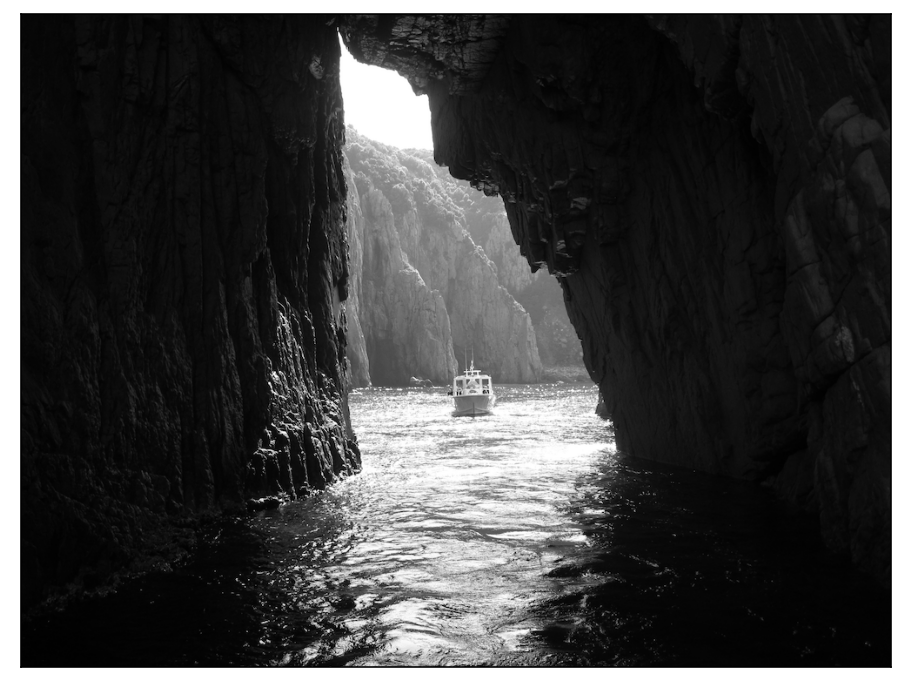

In [24]:
from PIL import Image
img = Image.open('corsica.tiff')
figure(1, [8, 6])
imshow(img, cmap='gray')
xticks([])
yticks([]);

In [25]:
img_array_four_channels = array(img) ## easy to convert it into a numpy array
## this tiff image format has four color channels
print(img_array_four_channels.shape) # red, green, blue, and alpha

(750, 1000, 4)


In [26]:
## each of the first three color channel has the same information
## lets see if all the values are the same
print(all(img_array_four_channels[..., 0] == img_array_four_channels[..., 1]))
print(all(img_array_four_channels[..., 0] == img_array_four_channels[..., 2]))
print(all(img_array_four_channels[..., 0] == img_array_four_channels[..., 3])) # last channel is different

True
True
False


In [ ]:
## data format is 'uint8' for 'unsigned' (i.e., non negative) 8bit integers
print(img_array_four_channels.dtype)

uint8


In [27]:
## We only need greyscale (one channel)
img_array = img_array_four_channels[..., 0] ## we can pick any of the first three channels
## lets also convert it to float64
img_array = float64(img_array)
## normalize the values to be in [0, 1]
img_array -= img_array.min()
img_array /= img_array.max()
print(img_array.min(), img_array.max())

0.0 1.0


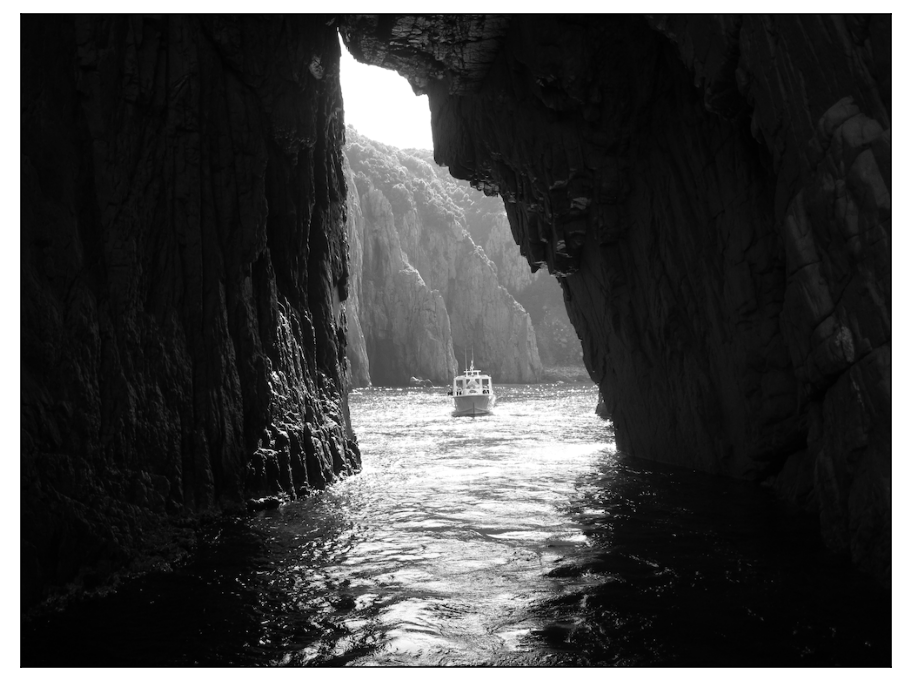

In [28]:
figure(1, [8, 6])
imshow(img_array, cmap='gray');
xticks([])
yticks([]);

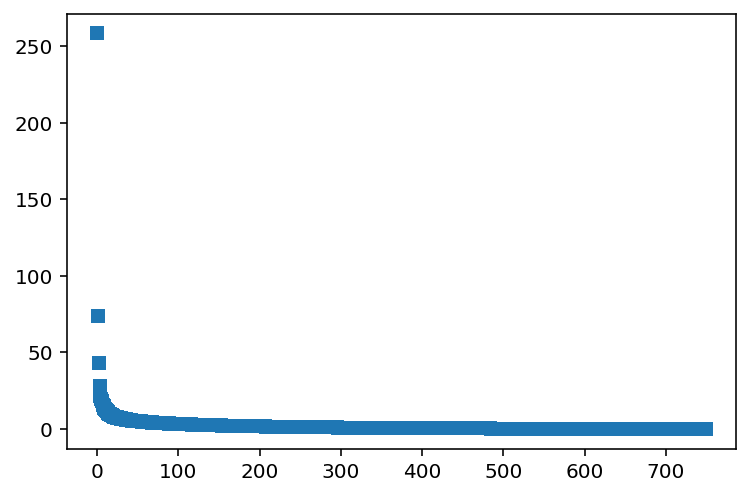

In [29]:
U, sigma, V = svd(img_array, full_matrices=False)
plot(sigma,"s")

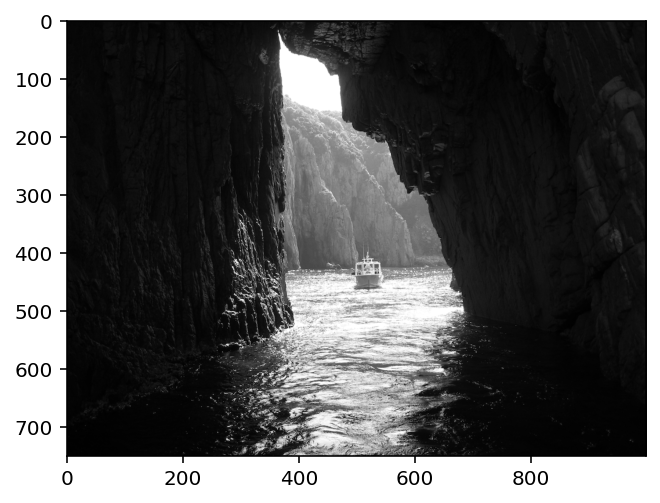

In [52]:
tol=0
U, sigma, VT = svd(img_array)
Ahat = zeros([750,1000])
for j in arange(750):
    uj = U[:, j]
    vj = VT[j, :]
    if sigma[j] < tol:
        sigma[j]=0
    Ahat += sigma[j]*uj[:, None]@vj[:, None].T
imshow(Ahat, cmap='gray');


